In [1]:
from CircuitCalculator.SignalProcessing.periodic_functions import RectFunction
from CircuitCalculator.Circuit.solution import ComplexSolution, TimeDomainSolution, FrequencyDomainSolution
from CircuitCalculator.Circuit.circuit import Circuit
from CircuitCalculator.Circuit.impedance import element_impedance
from CircuitCalculator.Circuit import components as cmp
from CircuitCalculator.SimpleAnalysis.PointerDiagram import voltage_pointer_diagram_analysis, current_pointer_diagram_analysis, power_pointer_diagram_analysis, plot_pointer_by_id
from CircuitCalculator.SimpleAnalysis.TimeSeries import steady_state_voltage_timedomain_analysis, steady_state_current_timedomain_analysis, plot_timeseries_by_id
from CircuitCalculator.SimpleAnalysis.FrequencyDomain import discrete_frequencies_voltage_analysis, discrete_frequencies_current_analysis, discrete_frequencies_power_analysis, plot_frequencies_by_id
from CircuitCalculator.SimpleAnalysis.NyquistDiagram import nyquist_voltage_analysis, plot_nyquist_by_id

In [2]:
circuit = Circuit([
    cmp.PeriodicVoltageSource(id='Uq', V=1, w=5000, wavetype=RectFunction, nodes=('1', '0')),
    cmp.Resistor(id='R', R=2, nodes=('1', '2')),
    cmp.Capacitor(id='C', C=1e-4, nodes=('2', '0')),
    cmp.Ground(nodes=('0',))
])
complex_solution = ComplexSolution(circuit, w=5000)
time_domain_solution = TimeDomainSolution(circuit, w_max=1000000)
frequency_domain_solution = FrequencyDomainSolution(circuit, w_max=50000)

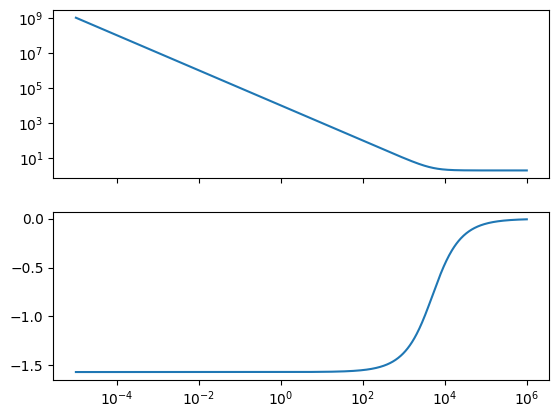

In [3]:
import numpy as np
import matplotlib.pyplot as plt
w = np.logspace(-5, 6, 1000)
Z = element_impedance(circuit=circuit, element_id='Uq', w=w)

fig, ax = plt.subplots(nrows=2, sharex=True)

# ax[0].loglog(w, 20*np.log10(np.abs(Z)))
ax[0].loglog(w, np.abs(Z))
ax[1].semilogx(w, np.angle(Z))



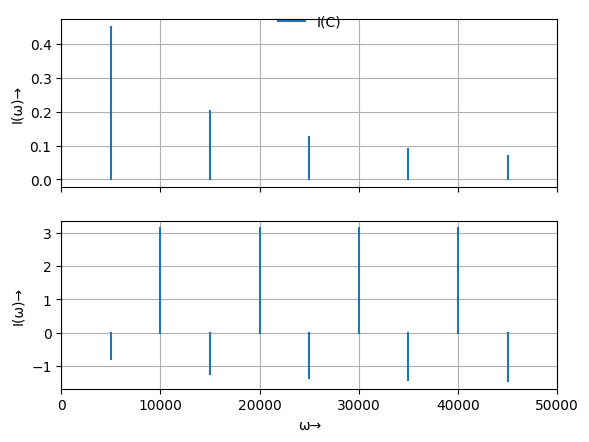

In [4]:
_ = discrete_frequencies_current_analysis(
    plot_frequencies_by_id('C'),
    solution=frequency_domain_solution,
    wmin=0,
    wmax=50000,
)